In [0]:
import pandas as pd
import io
import numpy as np
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Step 1: Download the data

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [28]:
x = '/content/drive/My Drive/DataLit/pml-training.csv'
dataframe_all = pd.read_csv(x, sep=',', na_values="NA",low_memory=False)
num_rows = dataframe_all.shape[0]
dataframe_all.shape

(19622, 160)

# Step 2: Remove useless data

In [32]:
# count the number of missing elements (NaN) in each column
counter_nan = dataframe_all.isnull().sum()
counter_without_nan = counter_nan[counter_nan==0]

# remove the columns with missing elements
dataframe_all = dataframe_all[counter_without_nan.keys()]

# remove the first 7 columns
dataframe_all = dataframe_all.iloc[:,7:]

columns = dataframe_all.columns

Index(['pitch_arm', 'yaw_arm', 'total_accel_arm', 'gyros_arm_x', 'gyros_arm_y',
       'gyros_arm_z', 'accel_arm_x', 'accel_arm_y', 'accel_arm_z',
       'magnet_arm_x', 'magnet_arm_y', 'magnet_arm_z', 'roll_dumbbell',
       'pitch_dumbbell', 'yaw_dumbbell', 'total_accel_dumbbell',
       'gyros_dumbbell_x', 'gyros_dumbbell_y', 'gyros_dumbbell_z',
       'accel_dumbbell_x', 'accel_dumbbell_y', 'accel_dumbbell_z',
       'magnet_dumbbell_x', 'magnet_dumbbell_y', 'magnet_dumbbell_z',
       'roll_forearm', 'pitch_forearm', 'yaw_forearm', 'total_accel_forearm',
       'gyros_forearm_x', 'gyros_forearm_y', 'gyros_forearm_z',
       'accel_forearm_x', 'accel_forearm_y', 'accel_forearm_z',
       'magnet_forearm_x', 'magnet_forearm_y', 'magnet_forearm_z', 'classe'],
      dtype='object')

# Step 3: get features (x) and scale the features

In [0]:
# get x and convert it to numpy array
x = dataframe_all.iloc[:,:-1].values # except the class label
standard_scaler = StandardScaler()
x_std = standard_scaler.fit_transform(x)
#print(x,x_std) #[  22.5 -161.    34.  ...  -17.   654.   476. ] , [ 0.8836666  -2.24744576  0.80701719 ...  0.85192734  0.53770054 0.22311218]

# Step 4: get class labels y and then encode it into number 

In [38]:
# get class label data
y = dataframe_all.iloc[:,-1].values
# encode the class label
class_labels = np.unique(y)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
#print(class_labels,y)#['A' 'B' 'C' 'D' 'E'] [0 0 0 ... 4 4 4]

['A' 'B' 'C' 'D' 'E'] [0 0 0 ... 4 4 4]


# Step 5: split the data into training set and test set

In [47]:
test_percentage = 0.1
x_train, x_test, y_train, y_test = train_test_split(x_std, y, test_size = test_percentage, random_state = 0)
#print(x_std.shape[0],x_train.shape[0],x_test.shape[0])#19622 17659 1963

19622 17659 1963


# Step 6 - t-distributed Stochastic Neighbor Embedding (t-SNE) visualization


In [51]:
tsne = TSNE(n_components=2, random_state=0)
x_test_2d = tsne.fit_transform(x_test) #Converted 38 columns into 2 columns
#print(x_test.shape,x_test_2d.shape)#(1963, 38) (1963, 2)
#print(x_test,x_test_2d)#[ 0.15031778  0.00867065  0.99709505 ... -0.83707859  0.38653067 0.58329264] , [ -7.8427043  -45.855007  ]

(1963, 38) (1963, 2)
[[ 0.15031778  0.00867065  0.99709505 ... -0.83707859  0.38653067
   0.58329264]
 [ 0.37586328  1.7182744   0.42686147 ... -1.32418098  1.53110254
  -2.46605476]
 [ 0.31589165 -0.45236183 -1.37887817 ... -0.84572538  0.69476014
   1.19532862]
 ...
 [ 0.58706774 -1.05212446 -0.33344996 ... -1.05901282 -0.05127298
   0.13374409]
 [-0.98718772  0.35759798  0.5219004  ... -0.55173458 -1.2763379
  -0.65973618]
 [ 2.51333064  1.67623496  0.33182254 ...  2.75133844 -1.07216041
  -0.83034798]] [[ -7.8427043  -45.855007  ]
 [ 22.135414    52.613125  ]
 [-37.20349      4.1139803 ]
 ...
 [  4.132049   -10.805977  ]
 [  0.15130764   1.8831921 ]
 [-64.14779     20.989286  ]]


In [53]:
for idx, cl in enumerate(np.unique(y_test)):
  print(idx)
  print(cl)

0
0
1
1
2
2
3
3
4
4


# Step 7-Scatter plot the sample points among 5 classes

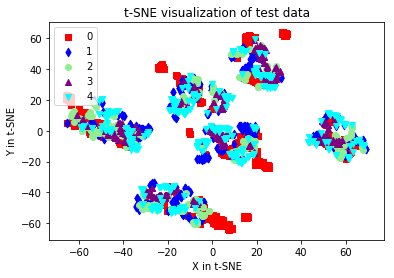

In [55]:
markers=('s', 'd', 'o', '^', 'v')
color_map = {0:'red', 1:'blue', 2:'lightgreen', 3:'purple', 4:'cyan'}
plt.figure()
for idx, cl in enumerate(np.unique(y_test)):
    plt.scatter(x=x_test_2d[y_test==cl,0], y=x_test_2d[y_test==cl,1], c=color_map[idx], marker=markers[idx], label=cl)
plt.xlabel('X in t-SNE')
plt.ylabel('Y in t-SNE')
plt.legend(loc='upper left')
plt.title('t-SNE visualization of test data')
plt.show()